In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import re
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer 
from nltk import download
download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 1 Step 1: Select and perform analysis

## 1.1 Load data using pandas

In [5]:
relative_folder_path = "../data/"

annotated_comments_name = "annotated_comments.tsv"
annotations_name = "annotations.tsv"
worker_demographics_name = "worker_demographics.tsv"

data_type_attack = "attack";
data_type_aggression = "aggression";
data_type_toxicity = "toxicity";

df_annotation_comments_attack = pd.read_csv(str(relative_folder_path + data_type_attack + "/" + data_type_attack + "_" + annotated_comments_name), sep='\t', header=0)
df_annotations_attack = pd.read_csv(str(relative_folder_path + data_type_attack + "/" + data_type_attack + "_" + annotations_name), sep='\t', header=0)
df_worker_demographics_attack = pd.read_csv(str(relative_folder_path + data_type_attack + "/" + data_type_attack + "_" + worker_demographics_name), sep='\t', header=0)

df_annotation_comments_toxicity = pd.read_csv(str(relative_folder_path + data_type_toxicity + "/" + data_type_toxicity + "_" + annotated_comments_name), sep='\t', header=0)
df_annotations_toxicity = pd.read_csv(str(relative_folder_path + data_type_toxicity + "/" + data_type_toxicity + "_" + annotations_name), sep='\t', header=0)
df_worker_demographics_toxicity = pd.read_csv(str(relative_folder_path + data_type_toxicity + "/" + data_type_toxicity + "_" + worker_demographics_name), sep='\t', header=0)

df_annotation_comments_aggression = pd.read_csv(str(relative_folder_path + data_type_aggression + "/" + data_type_aggression + "_" + annotated_comments_name), sep='\t', header=0)
df_annotations_aggression = pd.read_csv(str(relative_folder_path + data_type_aggression + "/" + data_type_aggression + "_" + annotations_name), sep='\t', header=0)
df_worker_demographics_aggression = pd.read_csv(str(relative_folder_path + data_type_aggression + "/" + data_type_aggression + "_" + worker_demographics_name), sep='\t', header=0)

df_attack = df_worker_demographics_attack.join(df_annotations_attack, on="worker_id", rsuffix="_r")
df_toxicity = df_worker_demographics_toxicity.join(df_annotations_toxicity, on="worker_id", rsuffix="_r")
df_aggression = df_worker_demographics_aggression.join(df_annotations_aggression, on="worker_id", rsuffix="_r")
df = df_attack.join(df_toxicity, on="worker_id", rsuffix="_r")
df = df.join(df_aggression, on="worker_id", rsuffix="_r")
df.head()

,worker_id,gender,english_first_language,age_group,education,rev_id,worker_id_r,quoting_attack,recipient_attack,third_party_attack,...,toxicity_score,worker_id_r,gender_r,english_first_language_r,age_group_r,education_r,rev_id_r,worker_id_r_r,aggression,aggression_score
0,833,female,0,45-60,bachelors,840118,305,0.0,0.0,0.0,...,1.0,1378.0,male,0.0,18-30,bachelors,1272192.0,1516.0,0.0,0.0
1,1072,male,0,30-45,bachelors,1078251,90,0.0,0.0,0.0,...,0.0,3486.0,male,0.0,18-30,hs,3604478.0,422.0,0.0,0.0
2,872,male,0,18-30,hs,907749,2136,0.0,0.0,0.0,...,-1.0,2268.0,female,1.0,45-60,hs,2333292.0,2167.0,0.0,0.0
3,2116,male,0,30-45,professional,2127009,1400,0.0,0.0,0.0,...,0.0,1491.0,male,0.0,30-45,bachelors,1344626.0,46.0,0.0,0.0
4,453,male,0,30-45,hs,462765,475,0.0,0.0,0.0,...,0.0,1376.0,male,0.0,18-30,professional,1272192.0,1384.0,0.0,0.0


## 1.2 Analysis of demographic information

Text(0.5, 1.0, 'Age group vs Aggression')

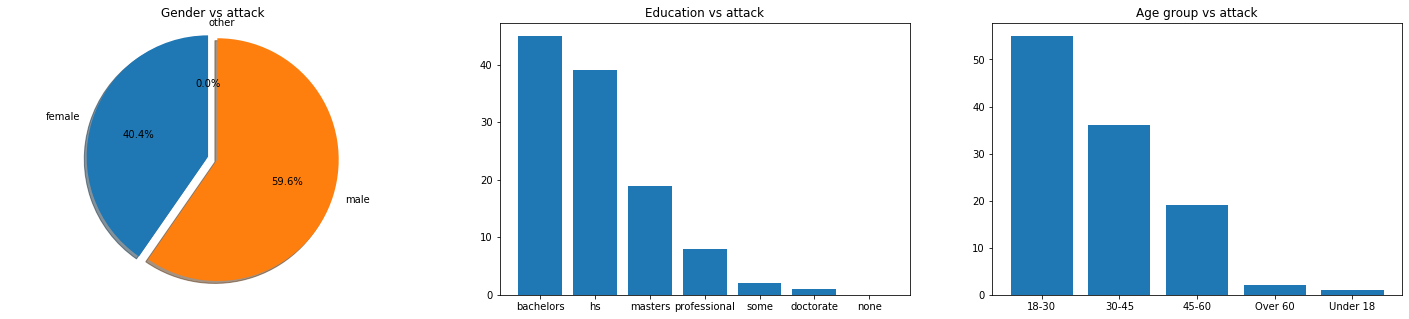

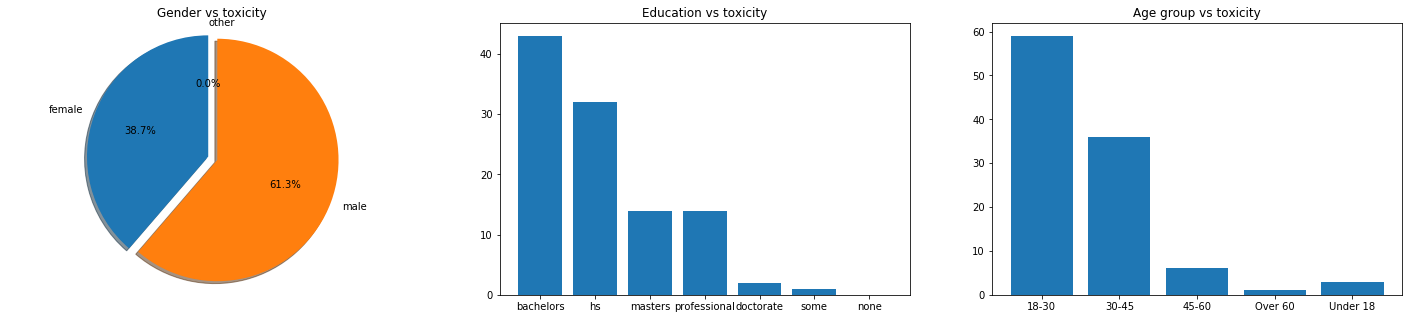

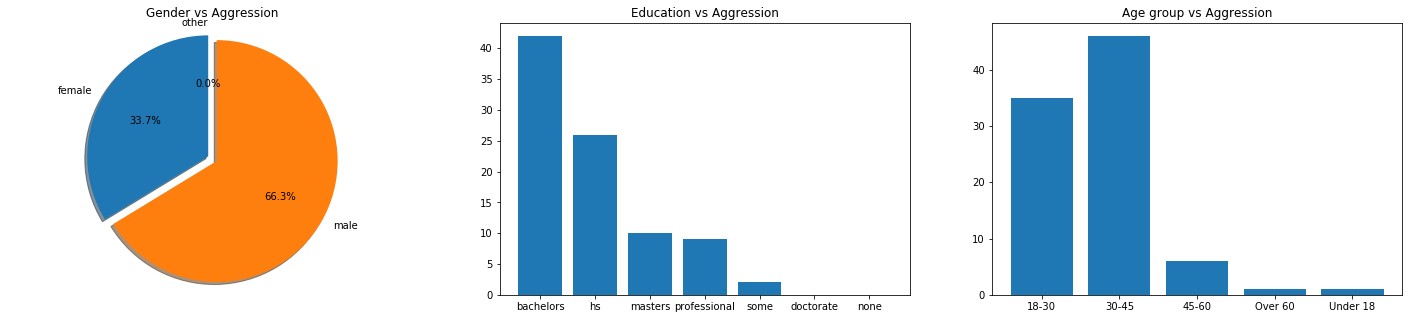

In [6]:
### ******** Gender vs attack *******
df_gender = df.groupby("gender").sum()
df_gender = df_gender.sort_values('gender')
df.head()

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(25,5))
ax[0].pie(list(df_gender['attack']), explode=(0, 0.08, 0), labels=list(df_gender.index), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[0].axis('equal')
ax[0].set_title('Gender vs attack')

### ******* Education vs attack *******
df_education = df.groupby("education").sum()
df_education = df_education.sort_values('attack', ascending=False)
df.head()

ax[1].bar(df_education.index, df_education['attack'])
ax[1].set_title('Education vs attack')

### ******* Age group vs attack *******
df_age_group = df.groupby("age_group").sum()
df_age_group = df_age_group.sort_values('age_group')
df.head()

ax[2].bar(df_age_group.index, df_age_group['attack'])
ax[2].set_title('Age group vs attack')


### ******** Gender vs toxicity *******
df_gender = df.groupby("gender").sum()
df_gender = df_gender.sort_values('gender')
df.head()

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(25,5))
ax[0].pie(list(df_gender['toxicity']), explode=(0, 0.08, 0), labels=list(df_gender.index), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[0].axis('equal')
ax[0].set_title('Gender vs toxicity')

### ******* Education vs toxicity *******
df_education = df.groupby("education").sum()
df_education = df_education.sort_values('toxicity', ascending=False)
df.head()

ax[1].bar(df_education.index, df_education['toxicity'])
ax[1].set_title('Education vs toxicity')

### ******* Age group vs toxicity *******
df_age_group = df.groupby("age_group").sum()
df_age_group = df_age_group.sort_values('age_group')
df.head()

ax[2].bar(df_age_group.index, df_age_group['toxicity'])
ax[2].set_title('Age group vs toxicity')


### ******** Gender vs Aggression *******
df_gender = df.groupby("gender").sum()
df_gender = df_gender.sort_values('gender')
df.head()

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(25,5))
ax[0].pie(list(df_gender['aggression']), explode=(0, 0.08, 0), labels=list(df_gender.index), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[0].axis('equal')
ax[0].set_title('Gender vs Aggression')

### ******* Education vs Aggression *******
df_education = df.groupby("education").sum()
df_education = df_education.sort_values('aggression', ascending=False)
df.head()

ax[1].bar(df_education.index, df_education['aggression'])
ax[1].set_title('Education vs Aggression')

### ******* Age group vs Aggression *******
df_age_group = df.groupby("age_group").sum()
df_age_group = df_age_group.sort_values('age_group')
df.head()

ax[2].bar(df_age_group.index, df_age_group['aggression'])
ax[2].set_title('Age group vs Aggression')

### Inference

- As it can been seen above, toxicity and attack is almost simliar to each other when compared across different age groups, people with different levels of education and their gender
- Majority of the highly attacking/toxic people have bachelors of high school degree. This coincides with the real world data in that people with higher levels of educations are lesser in comparision.
- As seen above, the nearly half the amount of workers belong to 18-30 age group
- Counts of workers decrease with increase in age indicating that workers are compromised mostly of people below 45 years of age
- Since the ratio of male:female is around 3:2, it does not closely represent the real world data in which the ratio is almost 1:1.
- Since age groups are categoried in increments of around 12-15, narrowing down the predictions by a model to tighter bounds of different age groups will be challenging task.
- On a slightly disimiliar note, aggression is high from people in 30-45 age group in comparison with younger audience.
- There is bias is the count of femalte workers in comparision with the count of male workers

## 1.3 Relationship between worker id and labelling behavior

Text(0.5, 1.0, 'Gender vs toxicity')

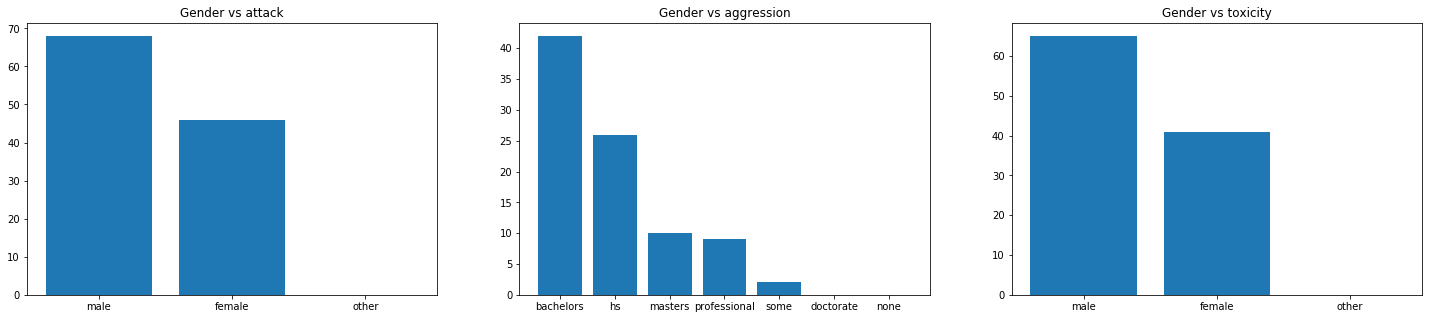

In [7]:
df_gender = df.groupby("gender").sum()
df_gender = df_gender.sort_values('attack', ascending=False)
df.head()

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(25,5))
ax[0].bar(df_gender.index, df_gender['attack'])
ax[0].set_title('Gender vs attack')

df_gender = df.groupby("gender").sum()
df_gender = df_gender.sort_values('aggression', ascending=False)
df.head()

ax[1].bar(df_education.index, df_education['aggression'])
ax[1].set_title('Gender vs aggression')

df_gender = df.groupby("gender").sum()
df_gender = df_gender.sort_values('toxicity', ascending=False)
df.head()

ax[2].bar(df_gender.index, df_gender['toxicity'])
ax[2].set_title('Gender vs toxicity')

# Inference

- As it can be seen above female workers are more likely to label a comment as attach than aggression
- Male workers tend to perceive more comments as aggression than female workers
- This bias based on gender in addition to parity in the number of male and female workers will likely result in incorrect labelling of comments. Since male workers are dominating, models are more likely to perceive a comments as aggression based on the above data.
- Bias exists on the dataset with respect of categorization of attacks, aggression or toxicity with respect to gender

# Step 2: Further Implications

#### Which, if any, of these demo applications would you expect the Perspective API—or any model trained on the Wikipedia Talk corpus—to perform well in? Why?

[Hot Topics](https://github.com/conversationai/perspective-hacks/blob/master/hot_topics/README.md) - Hot topics is an application to compare unpublished articles and find out the likelihood of it triggering heated arguments. 

I believe since the wikipedia corpus data contains a plethora of the comments and their respective scores for toxicity, attack and aggression. Since the the wikipedia corpus data represents an aggregation of the general user demographic, and since the demographic is likely to no vary much, models trained on the same would be able to generalize well and provide fairly accurate predictions

#### Which, if any, of these demo applications would you expect the Perspective API to perform poorly in? Why?

[Behave!](https://github.com/ArghTeam/behave-for-chrome) - Behave is application plugin for browsers to hide insenstive or toxic comments in wikipedia along with other websites like youtube. 

As mentioned in the earlier analysis, the proportion of male:female workers in the dataset is not balanced with repect to the general population. If the model is trained on the Perspective API dataset, there will exist a bias in favor of male workers who tend to rate a comment as aggressive more often. While in reality, this would not be welcome by female users of the application since female workers had less toxiticty scores. 




#### What are some other contexts or applications where you would expect the Perspective API to perform particularly well, or particularly poorly? Why?

Perspective API could be helper is NLP for analysis the tone of vidoes and movies and categories. Though a bit far fetched, an application can be developed to analyse the natual language context present in videos through speech recognization and use the recognized speech to analyze the toxicity nature. While this solve the granular problem of labelling a sentence or a sequence of words, an overall aggregation of these labells over the entire course of video could help in defining a normalized label for the these videos